# Linear Regression:
Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (predictors) by fitting a linear equation to observed data. The equation takes the form:

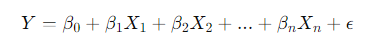

#Gradient Descent:

Gradient descent is an optimization algorithm used to minimize the loss function in various machine learning algorithms, including linear regression. It works by iteratively moving in the direction of the steepest descent of the loss function with respect to the model parameters.



The algorithm involves the following steps:

1. Initialize the parameters (coefficients) with random values.
2. Calculate the gradient of the loss function with respect to each parameter.
3. Update the parameters in the opposite direction of the gradient to minimize the loss.
4. Repeat steps 2 and 3 until convergence or a predefined number of iterations.

#1. Batch Gradient Descent:

Batch gradient descent computes the gradient of the loss function with respect to the entire training dataset. It updates the model parameters once per iteration.

#2. Mini Batch Gradient Descent:
Mini batch gradient descent computes the gradient of the loss function with respect to a small random subset of the training dataset (mini-batch). It updates the model parameters once per iteration using the gradient computed from the mini-batch.

#3. Stochastic Gradient Descent:
Stochastic gradient descent computes the gradient of the loss function with respect to a single training example. It updates the model parameters immediately after computing the gradient for each training example.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Batch Gradient Descent
lr_bgd = LinearRegressionBGD(learning_rate=0.01, n_iterations=1000)
lr_bgd.fit(X_train, y_train)
y_pred_bgd = lr_bgd.predict(X_test)
mse_bgd = mean_squared_error(y_test, y_pred_bgd)
print("Batch Gradient Descent MSE:", mse_bgd)

# Mini Batch Gradient Descent
from sklearn.utils import shuffle

from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class LinearRegressionBGD(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


class LinearRegressionMBGD(LinearRegressionBGD):
    def __init__(self, learning_rate=0.01, n_iterations=1000, batch_size=10):
        super().__init__(learning_rate, n_iterations)
        self.batch_size = batch_size

    def fit(self, X, y):
        n_samples, _ = X.shape
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            X, y = shuffle(X, y)
            for i in range(0, n_samples, self.batch_size):
                X_batch, y_batch = X[i:i+self.batch_size], y[i:i+self.batch_size]
                y_predicted = np.dot(X_batch, self.weights) + self.bias
                dw = (1 / len(y_batch)) * np.dot(X_batch.T, (y_predicted - y_batch))
                db = (1 / len(y_batch)) * np.sum(y_predicted - y_batch)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

lr_mbgd = LinearRegressionMBGD(learning_rate=0.01, n_iterations=1000, batch_size=10)
lr_mbgd.fit(X_train, y_train)
y_pred_mbgd = lr_mbgd.predict(X_test)
mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)
print("Mini Batch Gradient Descent MSE:", mse_mbgd)

# Stochastic Gradient Descent
class LinearRegressionSGD(LinearRegressionBGD):
    def fit(self, X, y):
        n_samples, _ = X.shape
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            X, y = shuffle(X, y)
            for i in range(n_samples):
                y_predicted = np.dot(X[i], self.weights) + self.bias
                dw = 2 * X[i] * (y_predicted - y[i])
                db = 2 * (y_predicted - y[i])
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

lr_sgd = LinearRegressionSGD(learning_rate=0.01, n_iterations=1000)
lr_sgd.fit(X_train, y_train)
y_pred_sgd = lr_sgd.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print("Stochastic Gradient Descent MSE:", mse_sgd)

Batch Gradient Descent MSE: 417.00933221477027
Mini Batch Gradient Descent MSE: 416.70664704377793
Stochastic Gradient Descent MSE: 410.45823116390164


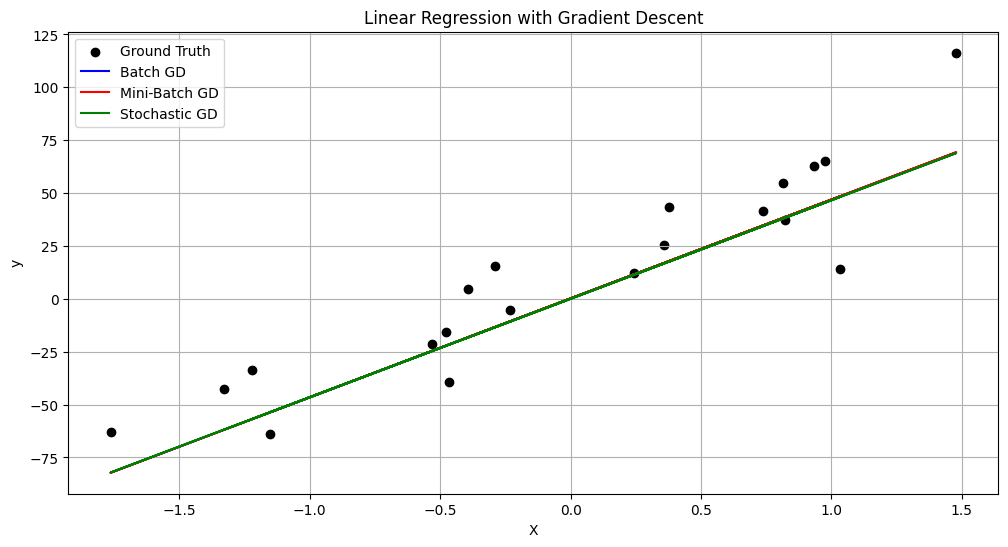

In [ ]:
import matplotlib.pyplot as plt

# Generate data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Batch Gradient Descent
lr_bgd = LinearRegressionBGD(learning_rate=0.01, n_iterations=1000)
lr_bgd.fit(X_train, y_train)
y_pred_bgd = lr_bgd.predict(X_test)

# Mini Batch Gradient Descent
lr_mbgd = LinearRegressionMBGD(learning_rate=0.01, n_iterations=1000, batch_size=10)
lr_mbgd.fit(X_train, y_train)
y_pred_mbgd = lr_mbgd.predict(X_test)

# Stochastic Gradient Descent
lr_sgd = LinearRegressionSGD(learning_rate=0.01, n_iterations=1000)
lr_sgd.fit(X_train, y_train)
y_pred_sgd = lr_sgd.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))

# Plot ground truth data
plt.scatter(X_test, y_test, color='black', label='Ground Truth')

# Plot predictions
plt.plot(X_test, y_pred_bgd, color='blue', label='Batch GD')
plt.plot(X_test, y_pred_mbgd, color='red', label='Mini-Batch GD')
plt.plot(X_test, y_pred_sgd, color='green', label='Stochastic GD')

plt.title('Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-4-e66e74e819a0>:84: RuntimeWarning: overflow encountered in multiply
  dw = 2 * X[i] * (y_predicted - y[i])
<ipython-input-4-e66e74e819a0>:86: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * dw


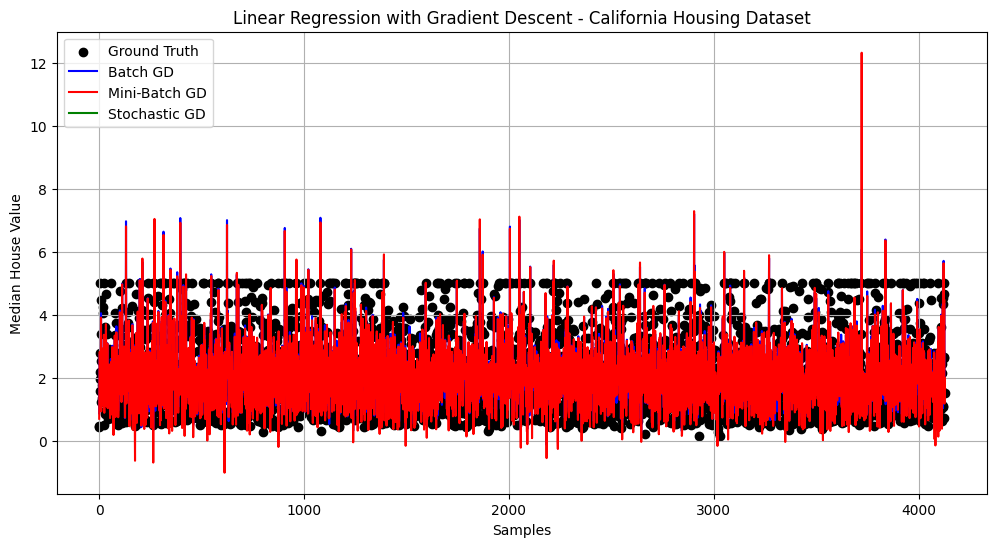

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Batch Gradient Descent
lr_bgd = LinearRegressionBGD(learning_rate=0.01, n_iterations=1000)
lr_bgd.fit(X_train, y_train)
y_pred_bgd = lr_bgd.predict(X_test)

# Mini Batch Gradient Descent
lr_mbgd = LinearRegressionMBGD(learning_rate=0.01, n_iterations=1000, batch_size=32)
lr_mbgd.fit(X_train, y_train)
y_pred_mbgd = lr_mbgd.predict(X_test)

# Stochastic Gradient Descent
lr_sgd = LinearRegressionSGD(learning_rate=0.01, n_iterations=1000)
lr_sgd.fit(X_train, y_train)
y_pred_sgd = lr_sgd.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))

# Plot ground truth data
plt.scatter(range(len(y_test)), y_test, color='black', label='Ground Truth')

# Plot predictions
plt.plot(range(len(y_test)), y_pred_bgd, color='blue', label='Batch GD')
plt.plot(range(len(y_test)), y_pred_mbgd, color='red', label='Mini-Batch GD')
plt.plot(range(len(y_test)), y_pred_sgd, color='green', label='Stochastic GD')

plt.title('Linear Regression with Gradient Descent - California Housing Dataset')
plt.xlabel('Samples')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mse_bgd = mean_squared_error(y_test, y_pred_bgd)
print("Batch Gradient Descent MSE:", mse_bgd)

mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)
print("Mini Batch Gradient Descent MSE:", mse_mbgd)

Batch Gradient Descent MSE: 0.5673403507337073
Mini Batch Gradient Descent MSE: 0.5598236313283503


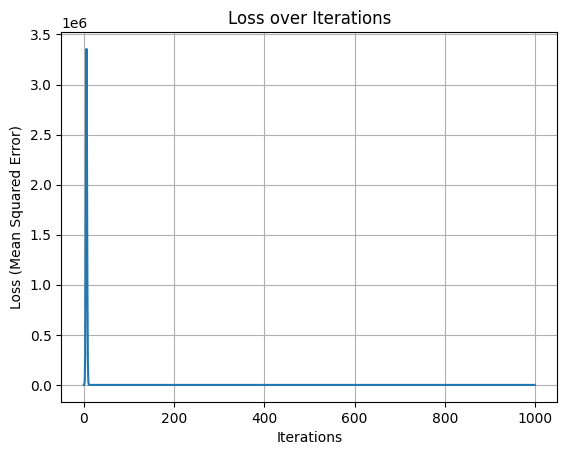

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the SGDRegressor model
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, loss='squared_error')
# Initialize an empty list to store loss values
losses = []

# Train the SGDRegressor model and record the loss after each iteration
for _ in range(sgd_regressor.max_iter):
    sgd_regressor.partial_fit(X_train, y_train)
    # Compute loss after each iteration
    y_pred = sgd_regressor.predict(X_train)
    loss = mean_squared_error(y_train, y_pred)
    losses.append(loss)

# Plot the loss over iterations
plt.plot(range(len(losses)), losses)
plt.xlabel('Iterations')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()

In [ ]:
# Predictions on testing data
y_pred_test = sgd_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) on testing data
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE) on testing data:", mse_test)

Mean Squared Error (MSE) on testing data: 0.5505549160648813
